In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


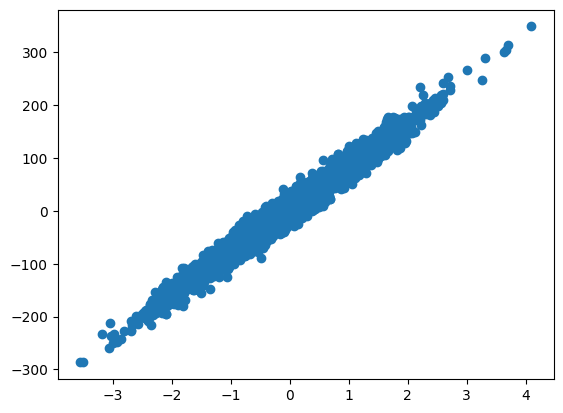

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
def hypothesis(X,w,w0):
    # ypred = []
    # for i in range(X.shape[0]):
    #     p = X[i].dot(w) + w0
    #     ypred.append(p)
    # return np.array(ypred)
    return w@X.T + w0

In [5]:
w = [1,2]
w0 = 1
ypred = hypothesis(np.array([[1,2],[3,4],[5,6]]),w,w0)

In [6]:
ypred

array([ 6, 12, 18])

In [7]:
def loss(X,w,w0,y):
    ypred = hypothesis(X,w,w0)
    return np.mean((ypred-y)**2)

In [8]:
w = [1]
w0 = 1
loss(X,w,w0,y)

6418.398281673329

In [9]:
def gradientDescent(X,y,lr=0.01,epochs = 100):
    w0 = 1
    w = np.ones(shape=(X.shape[1],))

    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        grad = np.mean((ypred-y)*X.T,axis = 1)
        # grad = np.zeros(shape=(X.shape[1],))
        # for j in range(X.shape[1]):
        #     # for i in range(X.shape[0]):
        #     #     grad[j] += (ypred[i] - y[i])*X[i,j]
        #     # grad[j] /= X.shape[0]
        #     grad[j] = np.mean((ypred-y)*X[:,j])

        w = w-lr*grad
        w0 = w0-lr*np.mean(ypred-y)
    return w,w0

In [10]:
w,w0 = gradientDescent(X,y,lr = 0.01,epochs=10000)

In [11]:
w,w0

(array([80.54363185]), 3.7279882844526835)

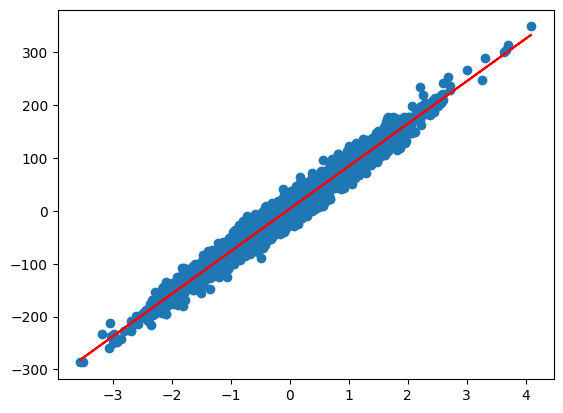

In [12]:
plt.scatter(X,y)
plt.plot(X,hypothesis(X,w,w0),c = 'r')
plt.show()

In [20]:
class LinearReg:
    def __init__(self,lr = 0.01,epochs = 100):
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.w,self.w0 = self.gradientDescent(X,y,self.lr,self.epochs)

    def hypothesis(self,X,w,w0):
        return w@X.T + w0

    def loss(self,X,w,w0,y):
        ypred = hypothesis(X,w,w0)
        return np.mean((ypred-y)**2)

    def gradientDescent(self,X,y,lr=0.01,epochs = 100):
        w0 = -3
        w = np.ones(shape=(X.shape[1],))*77
        self.loss_e = []
        self.th0 = [w0]
        self.th1 = [w[0]]
    
        for e in range(epochs):
            ypred = hypothesis(X,w,w0)
            self.loss_e.append(self.loss(X,w,w0,y))
            grad = np.mean((ypred-y)*X.T,axis = 1)
            w = w-lr*grad
            w0 = w0-lr*np.mean(ypred-y)
            self.th0.append(w0)
            self.th1.append(w[0])
            
        return w,w0

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
clf = LinearReg(epochs=400)
clf.fit(x_train,y_train)

In [24]:
print(clf.w,clf.w0)

[79.08564444] -0.3832297182100642


In [25]:
# clf.predict(x_test)

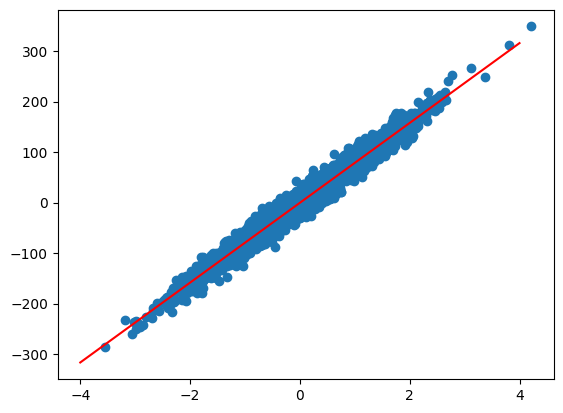

In [26]:
xt = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(x_train,y_train)
# plt.scatter(x_test,y_test)
plt.plot(xt,clf.predict(xt),c='r')
plt.show()

In [27]:
r2_score(y_test,clf.predict(x_test))

0.9738519073710686

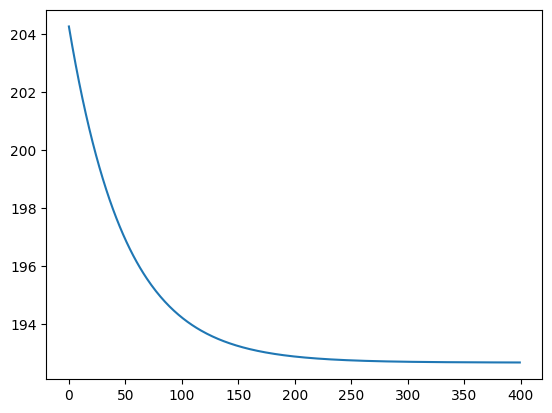

In [28]:
plt.plot(clf.loss_e)
plt.show()

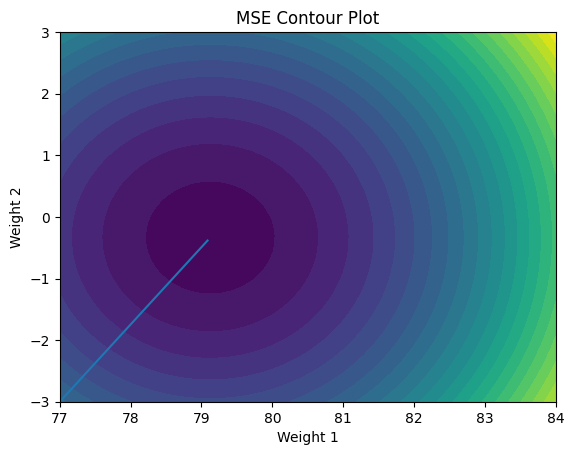

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume you have your data (X, y) and a trained linear regression model with weights 'w1' and 'w2' 
X = np.column_stack((x_train,np.ones_like(x_train)))
# Generate a grid of possible weights
w1_range = np.linspace(77, 84, 50)
w2_range = np.linspace(-3, 3, 50)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)

# Calculate MSE for each weight combination
mse_grid = np.zeros_like(w1_grid)
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        w1_test, w2_test = w1_grid[i, j], w2_grid[i, j]
        predicted = np.dot(X, [w1_test, w2_test])
        mse_grid[i, j] = mean_squared_error(y_train, predicted) 

# Create contour plot
plt.contourf(w1_grid, w2_grid, mse_grid, levels=30)
plt.plot(clf.th1,clf.th0)
plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("MSE Contour Plot")
plt.show()

In [36]:
x = np.column_stack((x_train,np.ones(shape=(x_train.shape[0],))))

In [37]:
x

array([[-0.07034736,  1.        ],
       [-0.06306126,  1.        ],
       [-0.43757137,  1.        ],
       ...,
       [-0.79815207,  1.        ],
       [ 0.31977372,  1.        ],
       [-0.57891382,  1.        ]])

In [38]:
ws = np.linalg.inv(x.T@(x)).dot(x.T.dot(y_train.reshape((-1,1)))) #Normal Equation

array([[79.12376724],
       [-0.33539865]])